In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import cifar10

In [21]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [31]:
model = Sequential()

In [34]:
model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu' ))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [35]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
model.fit(x_train, y_train_cat, epochs = 10, batch_size = 64, validation_data=(x_test, y_test_cat))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.2544 - loss: 1.9940 - val_accuracy: 0.4967 - val_loss: 1.4119
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4219 - loss: 1.5694 - val_accuracy: 0.5532 - val_loss: 1.2886
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4748 - loss: 1.4375 - val_accuracy: 0.5826 - val_loss: 1.1898
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5150 - loss: 1.3385 - val_accuracy: 0.6077 - val_loss: 1.1274
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5393 - loss: 1.2766 - val_accuracy: 0.6248 - val_loss: 1.0671
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5581 - loss: 1.2308 - val_accuracy: 0.6475 - val_loss: 1.0277
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5655 - loss: 1.1908 - val_accuracy: 0.6413 - val_loss: 1.0364
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5790 - loss: 1.1614 - val_ac

In [38]:
pd.DataFrame(model.history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.32878,1.809036,0.4967,1.411948
1,0.43738,1.527108,0.5532,1.288584
2,0.48658,1.412176,0.5826,1.189799
3,0.51808,1.331602,0.6077,1.127394
4,0.54264,1.272238,0.6248,1.067082
5,0.55796,1.229580,0.6475,1.027735
6,0.56596,1.193666,0.6413,1.036415
7,0.58026,1.163439,0.6567,0.999524
8,0.59298,1.129862,0.6614,0.989283
9,0.59856,1.111013,0.6578,1.000682


In [40]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [41]:
y_true = y_test.flatten()
y_pred = np.argmax(predictions, axis = 1)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_true, y_pred, target_names = class_names))

              precision    recall  f1-score   support

    airplane       0.68      0.72      0.70      1000
  automobile       0.87      0.73      0.79      1000
        bird       0.54      0.54      0.54      1000
         cat       0.44      0.43      0.43      1000
        deer       0.53      0.64      0.58      1000
         dog       0.61      0.55      0.58      1000
        frog       0.83      0.68      0.74      1000
       horse       0.77      0.69      0.73      1000
        ship       0.65      0.86      0.74      1000
       truck       0.76      0.76      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



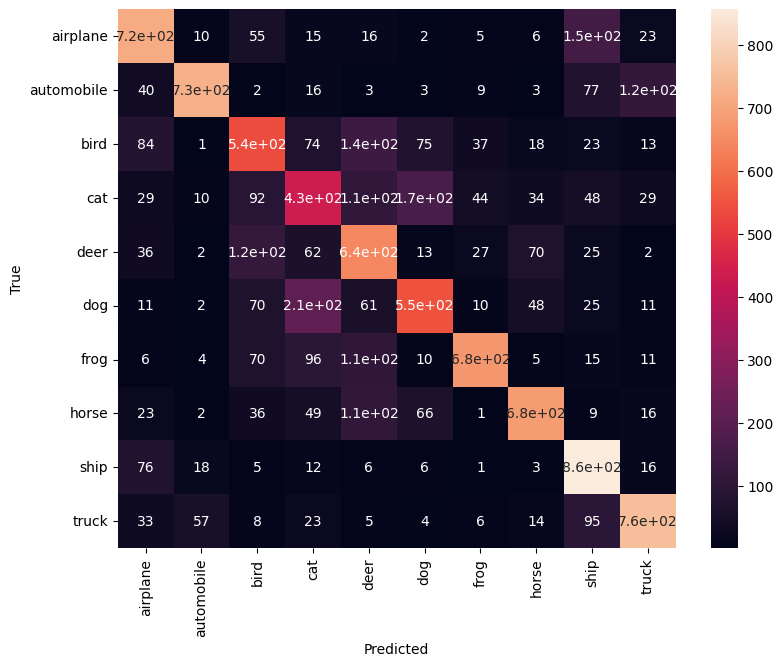

In [54]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (9,7))

sns.heatmap(cm, annot = True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

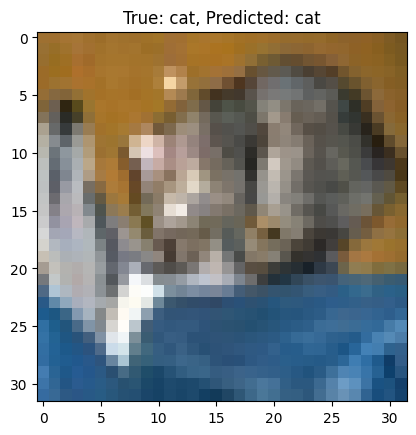

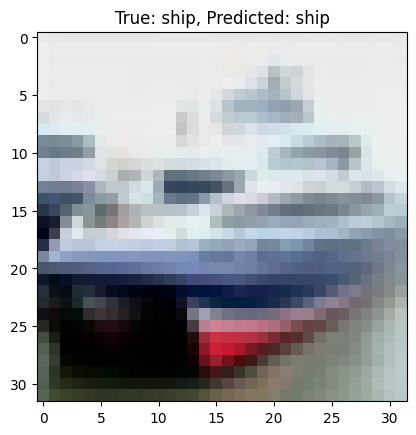

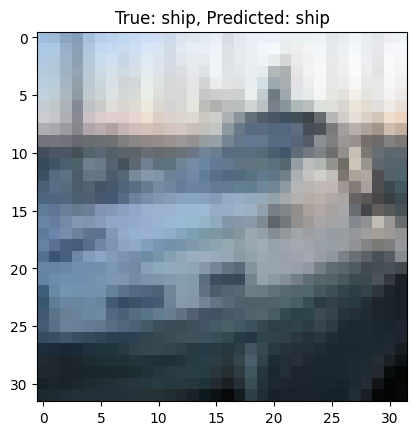

In [55]:
def view_predictions(index=0):
    plt.imshow(x_test[index])
    plt.title(f"True: {class_names[y_true[index]]}, Predicted: {class_names[y_pred[index]]}")
    plt.show()

# Try a few
view_predictions(0)
view_predictions(1)
view_predictions(2)
